# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1] ])  

# define y for output dataset      
y = np.array([[1, 0, 0, 1]]).T # 隨便打0或1
y

array([[1],
       [0],
       [0],
       [1]])

In [2]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3, 3)) - 1  # 介於 -1~1 的3X3矩陣

# define syn1
syn1 = 2*np.random.random((3, 1)) - 1  # 介於 -1~1 的3X1矩陣

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

syn0_history = [syn0]
syn1_history = [syn1]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

syn0、syn1
> 權重

l1、l2
> 輸出

In [3]:
for iter in range(10000):
    # forward propagation
    l0 = X # 4X3矩陣
    l1 = nonlin(np.dot(l0, syn0)) # 4X3 dot 3X3 = 4X3矩陣
    l2 = nonlin(np.dot(l1, syn1)) # 4X3 dot 3X1 = 4X1矩陣
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    
    l2_error = y - l2 # 4X1矩陣
    l2_delta = l2_error * nonlin(l2, deriv=True) # 4X1矩陣
 
    # how much did we miss?
    l1_error = l2_delta.dot(syn1.T) # 4X1 dot 1X3 = 4X3矩陣
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1, deriv=True) # 4X3矩陣
    
    # update weights
    syn1 += np.dot(l1.T, l2_delta) # 3X4 dot 4X1 = 3X1矩陣
    syn0 += np.dot(l0.T, l1_delta) # 3X4 dot 4X3 = 4X3矩陣
     # syn1 update weights
    
print("Output After Training (根據 L1):")
print(l1)
print("\n\n")
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L1):
[[2.53099650e-01 1.59519743e-01 9.18826743e-01]
 [7.60025111e-01 9.97191732e-06 4.22174000e-02]
 [1.84157914e-05 7.62782763e-01 5.45649367e-02]
 [1.72090502e-04 1.68918547e-04 2.24692329e-04]]



Output After Training (根據 L2):
[[0.99369923]
 [0.01260779]
 [0.0124362 ]
 [0.49993303]]


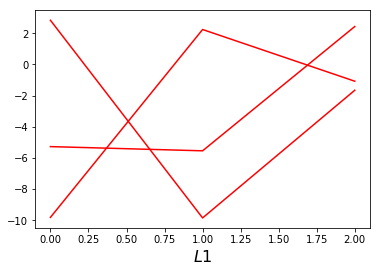

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='r')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

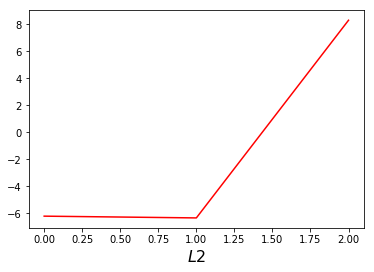

In [5]:
plt.plot(syn1_history[0], ms=3, lw=1.5, color='r')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()